In [93]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv('ParisHousing.csv')

In [97]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523.0,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771.0,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712.0,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316.0,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429.0,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,3440.0,62,1,1,72,59167,7,1,2009,1,0,7498,8398,489,1,5,354630.9
10003,5577.0,44,0,0,79,36379,7,5,2014,0,0,8539,1227,747,1,5,565361.4
10004,78789.0,30,1,0,52,94853,4,5,2017,0,1,5808,1954,198,0,6,7885033.7
10005,82517.0,24,1,0,97,87590,7,1,2011,0,1,5963,6047,579,0,1,8262678.1


In [99]:
df.shape

(10007, 17)

In [101]:
duplicates = df[df.duplicated(keep=False)]

In [103]:
duplicates

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
1542,71061.0,42,0,0,75,35582,6,4,1993,1,1,7747,862,466,1,5,7109849.3
1543,26479.0,71,1,1,99,61849,1,7,2009,1,0,4468,6440,210,1,2,2655657.9
1544,3440.0,62,1,1,72,59167,7,1,2009,1,0,7498,8398,489,1,5,354630.9
1545,5577.0,44,0,0,79,36379,7,5,2014,0,0,8539,1227,747,1,5,565361.4
1546,78789.0,30,1,0,52,94853,4,5,2017,0,1,5808,1954,198,0,6,7885033.7
1547,82517.0,24,1,0,97,87590,7,1,2011,0,1,5963,6047,579,0,1,8262678.1
1548,11602.0,85,0,1,47,45724,5,9,2008,0,1,3765,2075,402,0,5,1167525.8
10000,71061.0,42,0,0,75,35582,6,4,1993,1,1,7747,862,466,1,5,7109849.3
10001,26479.0,71,1,1,99,61849,1,7,2009,1,0,4468,6440,210,1,2,2655657.9
10002,3440.0,62,1,1,72,59167,7,1,2009,1,0,7498,8398,489,1,5,354630.9


In [105]:
df = df.drop_duplicates()


In [107]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523.0,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771.0,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712.0,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316.0,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429.0,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726.0,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403.0,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841.0,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036.0,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [109]:
null_rows = df[df.isnull().any(axis=1)]


In [111]:
null_rows

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
6,NaN,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5
20,NaN,64,1,1,50,97667,3,4,2009,1,1,9862,2666,330,1,0,2888047.9
61,NaN,17,0,0,68,64247,7,1,2013,0,1,327,209,352,1,8,4797883.3
79,61534.0,73,1,0,97,22943,9,5,2001,0,0,9265,8974,755,1,6,NaN
121,NaN,70,1,0,74,25093,9,6,2011,0,0,7173,9144,498,1,9,1833338.1
186,NaN,69,0,1,36,57473,4,3,2018,0,0,9847,6227,140,1,4,7394635.8
257,NaN,26,1,0,46,73572,3,5,2001,1,0,5447,3025,610,0,3,4773352.1
548,47781.0,49,0,0,37,16377,6,8,1993,1,1,6426,3436,993,1,4,NaN
662,NaN,60,0,0,14,79444,3,9,2001,0,0,1889,9650,660,1,0,9827936.1
941,1347.0,45,1,1,39,52035,7,7,1998,0,0,3579,9146,714,0,7,NaN


In [113]:
df.isnull().sum()

squareMeters         20
numberOfRooms         0
hasYard               0
hasPool               0
floors                0
cityCode              0
cityPartRange         0
numPrevOwners         0
made                  0
isNewBuilt            0
hasStormProtector     0
basement              0
attic                 0
garage                0
hasStorageRoom        0
hasGuestRoom          0
price                 5
dtype: int64

In [115]:
df.dtypes

squareMeters         float64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object

In [117]:
#Handle missing values for numerical values
 
# Feature to analyze
feature = 'squareMeters'
 
# Check for skewness
skewness = df[feature].skew()
print(f"Skewness of {feature}: {skewness}")
 
# Handle missing values based on skewness
if abs(skewness) < 0.5:  # Near-normal distribution
    df[feature] = df[feature].fillna(df[feature].mean())
    print(f"Missing values in '{feature}' filled with mean: {df[feature].mean():.2f}")
else:  # Skewed distribution
    df[feature] = df[feature].fillna(df[feature].median())
    print(f"Missing values in '{feature}' filled with median: {df[feature].median():.2f}")

Skewness of squareMeters: -0.007390570606128537
Missing values in 'squareMeters' filled with mean: 49874.75


/var/folders/hk/jrmj5krn1m13rs2ldn9zl6q40000gn/T/ipykernel_990/3462661853.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].fillna(df[feature].mean())


In [119]:
df.head(9)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523.000000,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771.000000,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712.000000,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316.000000,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429.000000,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
5,39223.000000,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2
6,49874.746092,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5
7,86929.000000,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3
8,51522.000000,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2


In [121]:
#Handle missing values for numerical values
 
# Feature to analyze
feature = 'price'
 
# Check for skewness
skewness = df[feature].skew()
print(f"Skewness of {feature}: {skewness}")
 
# Handle missing values based on skewness
if abs(skewness) < 0.5:  # Near-normal distribution
    df[feature] = df[feature].fillna(df[feature].mean())
    print(f"Missing values in '{feature}' filled with mean: {df[feature].mean():.2f}")
else:  # Skewed distribution
    df[feature] = df[feature].fillna(df[feature].median())
    print(f"Missing values in '{feature}' filled with median: {df[feature].median():.2f}")

Skewness of price: -0.006101311321462633
Missing values in 'price' filled with mean: 4993378.48


/var/folders/hk/jrmj5krn1m13rs2ldn9zl6q40000gn/T/ipykernel_990/1141099118.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].fillna(df[feature].mean())


In [123]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523.0,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771.0,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712.0,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316.0,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429.0,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726.0,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403.0,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841.0,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036.0,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [125]:
Q1 = df['numberOfRooms'].quantile(0.25)
Q3 = df['numberOfRooms'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['numberOfRooms'] < lower_bound) | (df['numberOfRooms'] > upper_bound)]


In [127]:
upper_bound

150.0

In [129]:
outliers

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
7311,38190.0,300,1,1,13,92961,8,10,2003,1,1,8081,7497,462,0,8,3825454.3
8132,10841.0,299,1,0,19,9333,9,6,2019,0,1,4556,3040,743,0,8,1087980.9
9398,75841.0,189,0,1,96,83005,9,10,1996,0,1,9801,2552,850,1,1,7594188.6


/var/folders/hk/jrmj5krn1m13rs2ldn9zl6q40000gn/T/ipykernel_990/4121295322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outliers_iqr'] = (df['numberOfRooms'] < Q1 - 1.5 * IQR) | \


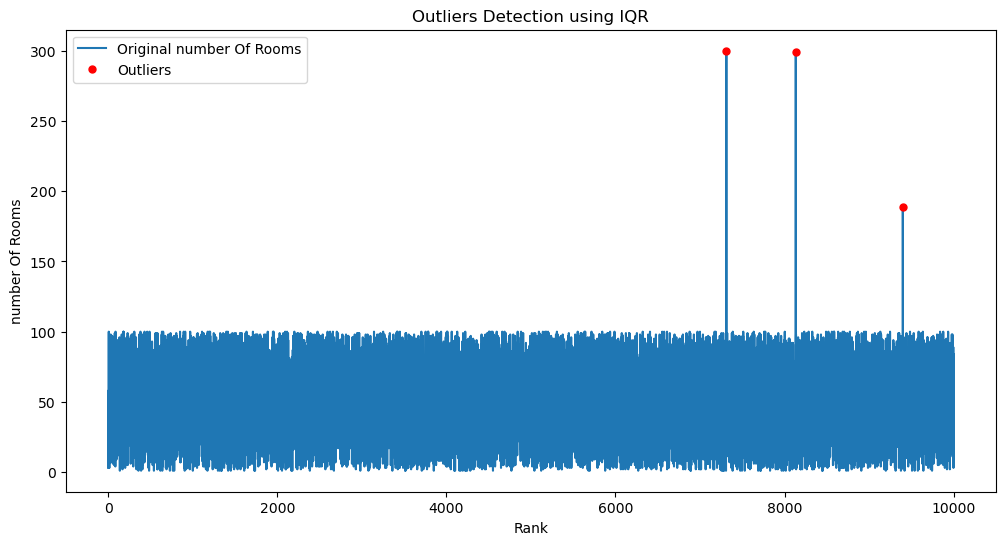

In [131]:
df['outliers_iqr'] = (df['numberOfRooms'] < Q1 - 1.5 * IQR) | \
                                               (df['numberOfRooms'] > Q3 + 1.5 * IQR)

plt.figure(figsize=(12, 6))
plt.plot(df.index, 
         df['numberOfRooms'], 
         label='Original number Of Rooms')

plt.plot(df[df['outliers_iqr']].index, 
         df[df['outliers_iqr']]['numberOfRooms'], 
         'ro', markersize=5, label='Outliers')

plt.xlabel('Rank')
plt.ylabel('number Of Rooms')
plt.title('Outliers Detection using IQR')
plt.legend()
plt.show()

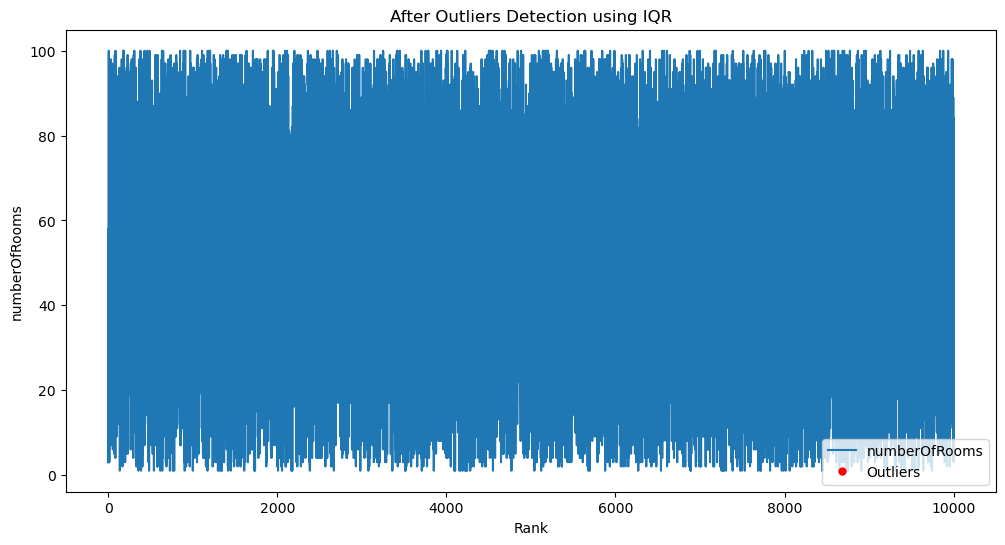

In [132]:
df = df[(df['numberOfRooms'] >= lower_bound) & (df['numberOfRooms'] <= upper_bound)]
plt.figure(figsize=(12, 6))
plt.plot(df.index, 
         df['numberOfRooms'], 
         label='numberOfRooms')

plt.plot(df[df['outliers_iqr']].index, 
         df[df['outliers_iqr']]['numberOfRooms'], 
         'ro', markersize=5, label='Outliers')

plt.xlabel('Rank')
plt.ylabel('numberOfRooms')
plt.title('After Outliers Detection using IQR')
plt.legend()
plt.show()

In [134]:

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization (transform all numerical columns)
normalized_data = scaler.fit_transform(df)

# Convert back to DataFrame (optional)
df_normalized = pd.DataFrame(normalized_data, columns=df.columns)


In [138]:
df_normalized

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,outliers_iqr
0,0.755020,0.020202,0.0,1.0,0.626263,0.093747,0.222222,0.777778,0.483871,0.0,1.0,0.4313,0.900490,0.951111,0.0,0.7,0.755144,0.0
1,0.807547,0.383838,1.0,1.0,0.979798,0.393977,0.777778,0.555556,0.806452,1.0,0.0,0.3653,0.243524,0.031111,1.0,0.2,0.807854,0.0
2,0.556731,0.575758,0.0,1.0,0.181818,0.344712,0.555556,0.777778,1.000000,0.0,0.0,0.2937,0.885189,0.038889,1.0,0.9,0.556630,0.0
3,0.322560,0.464646,0.0,0.0,0.050505,0.279500,1.000000,0.333333,0.709677,0.0,1.0,0.0659,0.714071,0.287778,0.0,0.3,0.322339,0.0
4,0.704034,0.181818,1.0,1.0,0.898990,0.380610,0.222222,0.666667,0.000000,1.0,0.0,0.8435,0.242824,0.213333,1.0,0.4,0.704723,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0.016385,0.888889,0.0,1.0,0.040404,0.731666,0.666667,0.555556,0.612903,0.0,1.0,0.9311,0.169717,0.131111,0.0,0.4,0.016617,0.0
9993,0.443539,0.282828,1.0,1.0,0.111111,0.346203,0.888889,0.333333,0.000000,0.0,1.0,0.9061,0.174117,0.144444,0.0,0.0,0.443973,0.0
9994,0.838274,0.020202,0.0,0.0,0.686869,0.809705,1.000000,1.000000,0.483871,1.0,1.0,0.8304,0.772977,0.272222,1.0,0.9,0.838269,0.0
9995,0.590001,0.696970,0.0,0.0,0.959596,0.558809,0.000000,0.222222,0.645161,0.0,1.0,0.2590,0.617362,0.265556,1.0,0.4,0.589688,0.0


In [140]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,outliers_iqr
0,75523.0,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,False
1,80771.0,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,False
2,55712.0,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,False
3,32316.0,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,False
4,70429.0,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726.0,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,False
9996,44403.0,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,False
9997,83841.0,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,False
9998,59036.0,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,False
